# Eksploratorna analiza podataka za projekt 'Predviđanje uspjeha bankarskog marketinga'
### Davorin Gradečak, Petra Jambriško i Jakov Krunić
travanj 2020.

## Opis podataka

Skup podataka i informacije o problemu dostupne su na sljedećem linku: [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing). Koristimo noviju verziju podataka. Podaci su podijeljeni u dva skupa podataka (bank-additional-full.csv i bank-additional.csv). To su *train* podaci i *test* podaci. Skup podataka *train* se sastoji od 41188 instanci, a skup podataka *test* se sastoji od 4119 instanci, tj. 10% instanci iz *train* skupa koje su odabrane nasumično. Svaka instanca predstavlja određenog korisnika banke. Svaki korisnik je opisan s 20 atributa i atributom y koji predviđamo (target).

Popis atributa:
- age: dob korisnika, numerička varijabla
- job: vrsta posla korisnika, kategorijska varijabla (12 kategorija)
- marital: bračni status korisnika, kategorijska varijabla (4 kategorije)
- education: stupanj obrazovanja korisnika, kategorijska varijabla (8 kategorija)
- default: ima li korisnik neizvršene novčane obaveze, kategorijska varijabla (kategorije: 'no', 'yes', 'unknown')
- housing: ima li korisnik stambeni kredit, kategorijska varijabla (kategorije: 'no', 'yes', 'unknown')
- loan: ima li korisnik osobne zajmove, kategorijska varijabla (kategorije: 'no', 'yes', 'unknown')
- contact: tip komunikacije s korisnikom, kategorijska varijabla (kategorije: 'cellular', 'telephone')
- month: mjesec kad je obavljen zadnji kontakt s korisnikom, kategorijska varijabla (12 kategorija)
- day_of_week: dan u tjednu kad je obavljen zadnji kontakt s korisnikom, kategorijska varijabla (5 kategorija)
- duration: trajanje zadnjeg kontakta s korisnikom u sekndama, numerička varijabla
- campaign: broj kontaktiranja korisnika tijekom trenutne kampanje, numerička varijabla
- pdays: broj dana koji su prošli od zadnjeg kontaktiranja korisnika tijekom prethodne kampanje, numerička varijabla (999 znači da nisu bili kontaktirani prije)
- previous: broj kontaktiranja korisnika prije trenutne kampanje, numerička varijabla
- poutcome: ishod prethodne kampanje, kategorijska varijabla (kategorije: 'failure', 'nonexistent', 'success')
- emp.var.rate: stopa varijacije zaposlenosti-kvartalni indikator, numerička varijabla
- cons.price.idx: indeks potrošačkih cijena-mjesečni indikator, numerička varijabla
- cons.conf.idx: indeks povjerenja potrošača-mjesečni indikator, numerička varijabla
- euribor3m: euribor tromjesečna stopa-dnevni indikator, numerička varijabla
- nr.employed: broj zaposlenih-kvartalni indikator, numerička varijabla
- y: podatak koji predviđamo (**target**), je li korisnik ugovorio oročeni depozit ili ne, kategorijska varijabla (kategorije: 'yes', 'no')


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.preprocessing as preprocessing

%matplotlib inline

In [2]:
train = pd.read_csv('bank-additional-full.csv', sep=';')
test = pd.read_csv('bank-additional.csv', sep=';')

In [3]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Mogli smo primjetiti kako vrijednosti atributa 'y' koji želimo predivdjeti iznose 'yes' i 'no'. Binarni klasifikator zahtijeva numeričke vrijednosti tako da ćemo vrijednosti tog atributa promijeniti. Preslikavamo 'no' u 0, a 'yes' u 1. U drugoj fazi projektnog zadatka ćemo slično učiniti i s preostalim atributima kategorijskih vrijednosti kako bi naši algoritmi i metode strojnog učenja mogli ispravno raditi s numeričkim podacima. Zasad to još ne radimo jer će grafovi koje iscrtavamo biti više informativni s pravim atributima. Stoga u daljnjoj analizi korisnici koji su ugovorili oročeni depozit imaju vrijednost atributa 'y' jedan, dok oni koji nisu ugovorili oročeni depozit imaju vrijednost atributa 'y' nula.

In [4]:
map = {'no' : 0, 'yes' : 1}
train = train.replace({'y' : map})
test = test.replace({'y' : map})
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


36548 / 4640


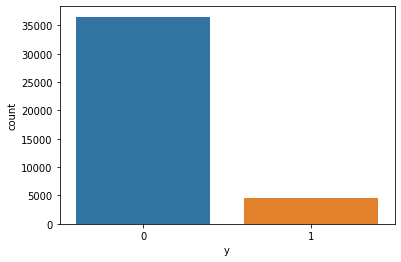

In [5]:
neg, pos = train['y'].value_counts()
print(neg, '/', pos)
sns.countplot(x='y', data=train)

In [6]:
def ra(a, b):
    a = float(a)
    b = float(b)
    if b == 0:
        return a
    return ra(b, a % b)

def get_ratio(a, b):
    r = ra(a, b)
    return '%.2f' % float((a/r) / (b/r))

def ratio(a, b):
    return '%.f/%.f' % (float(a)/(a+b)*100, float(b)/(a+b)*100)

In [7]:
get_ratio(neg, pos), ratio(neg, pos)

('7.88', '89/11')

Od ukupno 41188 primjera u skupu podataka za učenje, za njih 36548 vrijednost ciljne varijable je 0 (to su korisnici koji nisu ugovorili oročeni depozit), a za njih 4640 vrijednost ciljne varijable je 1 (to su korisnici koji su ugovorili oročeni depozit). Primijetimo da je negativnih slučajeva skoro 8 puta više od pozitivnih, tj. omjer negativni/pozitivni jednak je 89/11. Stoga možemo reći da su podaci prilično neuravnoteženi. Dobro je zamijetiti kako bi trivijalan klasifikator, koji za sve korisnike predviđa negativan odgovor, postigao točnost od 89%.

## Pregled vrijednosti po atributima

Sljedeći grafovi prikazuju koliko je korisnika zaposleno u pojedinim sektorima, kakvo je njihovo bračno stanje te koji je njihov stupanj obrazovanja.

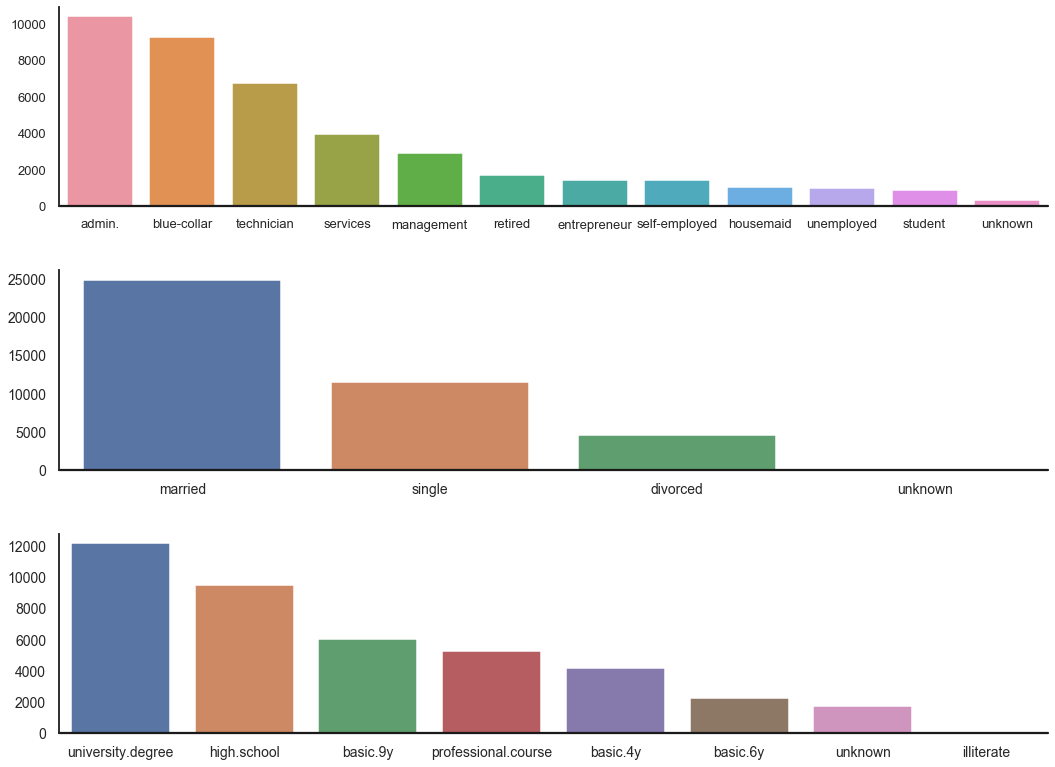

In [8]:
sns.set(style="white", context="talk")
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 11), sharex=False)


y1 = train['job'].value_counts()
x1 = np.asarray(y1.axes[0])
sns.barplot(x=x1, y=y1, ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.tick_params(labelsize=13)
ax1.set_ylabel("")
#print(y1)

y2 = train['marital'].value_counts()
x2 = np.asarray(y2.axes[0])
sns.barplot(x=x2, y=y2, ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.tick_params(labelsize=14)
ax2.set_ylabel("")
#print(y2)


y3 = train['education'].value_counts()
x3 = np.asarray(y3.axes[0])
sns.barplot(x=x3, y=y3, ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.tick_params(labelsize=14)
ax3.set_ylabel("")

sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

Možemo vidjeti kako najviše ispitanika obavlja administrativne poslove, ili su iz radničke klase, ili su tehničari. Najviše njih je oženjeno te ih je većina završila ili fakultet, ili srednju školu.

Isto tako, možemo po tim kategorijama vidjeti koliko je korisnika ugovorilo oročeni depozit, a koliko nije.

Text(0.5, 0, '')

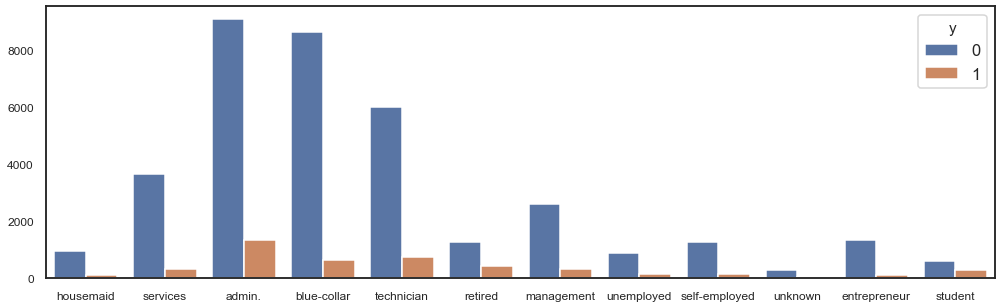

In [9]:
f, (ax1) = plt.subplots(1, 1, figsize=(17, 5), sharex=False)
ax1 = sns.countplot(x='job', hue='y',data=train)
ax1.tick_params(labelsize=12)
ax1.set_ylabel("")
ax1.set_xlabel("")

Text(0.5, 0, '')

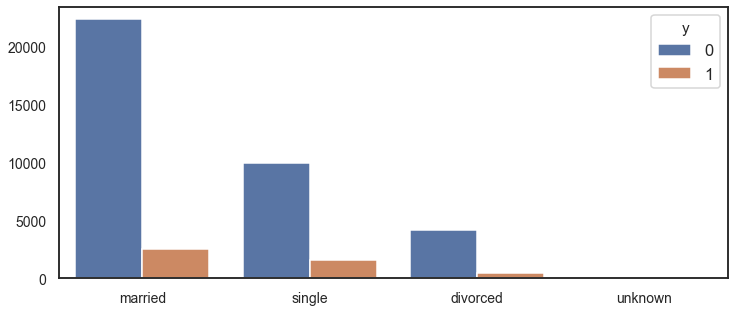

In [10]:
f, (ax1) = plt.subplots(1, 1, figsize=(12, 5), sharex=False)
ax1 = sns.countplot(x='marital', hue='y',data=train)
ax1.tick_params(labelsize=14)
ax1.set_ylabel("")
ax1.set_xlabel("")

Text(0.5, 0, '')

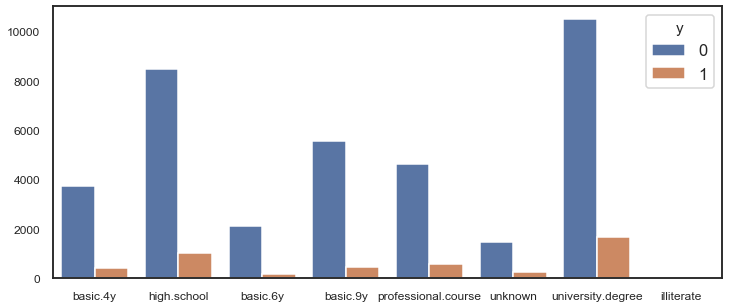

In [11]:
f, (ax1) = plt.subplots(1, 1, figsize=(12, 5), sharex=False)
ax1 = sns.countplot(x='education', hue='y',data=train)
ax1.tick_params(labelsize=12)
ax1.set_ylabel("")
ax1.set_xlabel("")

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64


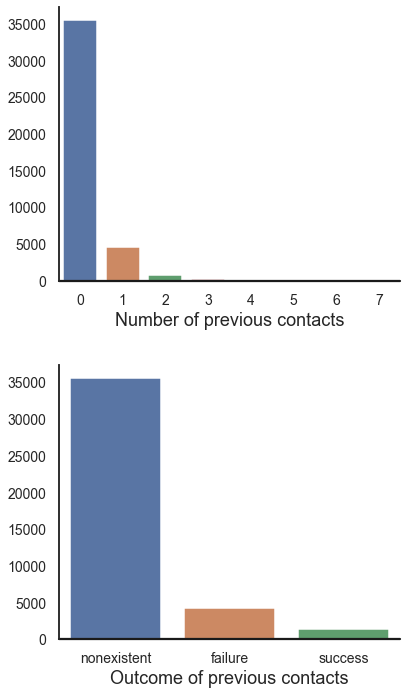

In [12]:
sns.set(style="white", context="talk")
f, (ax3, ax4) = plt.subplots(2, 1, figsize=(6, 10), sharex=False)

#x3 = np.unique(np.array(train['previous']))
y3 = train['previous'].value_counts()
x3 = np.asarray(y3.axes[0])
sns.barplot(x=x3, y=y3, ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.tick_params(labelsize=14)
ax3.set_ylabel("")
ax3.set_xlabel("Number of previous contacts")
print(y3)
#x4 = np.array(["nonexistent", "failure", "success"])
y4 = train['poutcome'].value_counts()
x4 = np.asarray(y4.axes[0])
sns.barplot(x=x4, y=y4, ax=ax4)
ax4.axhline(0, color="k", clip_on=False)
ax4.tick_params(labelsize=14)
ax4.set_ylabel("")
ax4.set_xlabel("Outcome of previous contacts")

sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

Možemo primijetiti da je najviše ispitanika u trenutnoj kampanji prvi puta ispitivano, a puno manje je onih koji su bili ispitivani 2 ili više puta. Također, vidimo da je više ispitanika prije trenutne kampanje odbilo ugovoriti oročeni depozit, nego prihvatiti. 

Na sljedećim će grafovima biti prikazano koliko je korisnika ugovorilo oročeni depozit, a koliko nije, u ovisnosti o trenutku kontaktiranja, načinu kontaktiranja i trajanju kontaktiranja.

Text(0.5, 0, '')

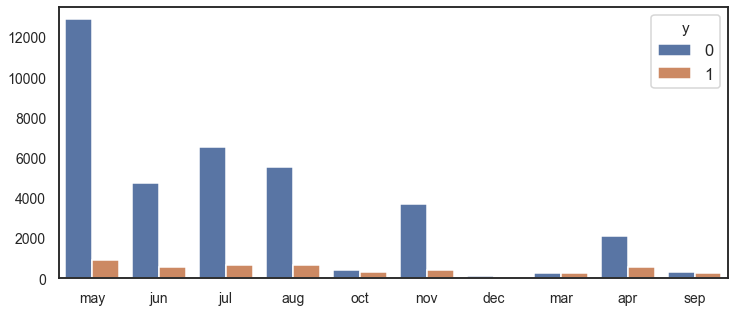

In [13]:
f, (ax1) = plt.subplots(1, 1, figsize=(12, 5), sharex=False)
ax1 = sns.countplot(x='month', hue='y',data=train)
ax1.tick_params(labelsize=14)
ax1.set_ylabel("")
ax1.set_xlabel("")

Uočavamo da ispitivanja uopće nisu održavala u siječnju i veljači te vrlo malo u prosincu. Najviše ispitivanja je provedeno u svibnju. Možemo primijetiti da mjesec ispitivanja ne utječe puno na odluku korisnika.

Text(0.5, 0, '')

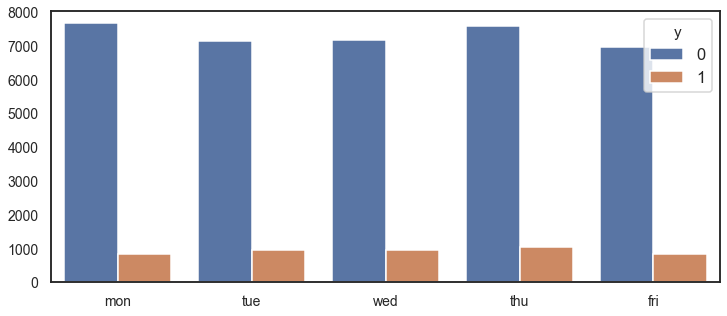

In [14]:
f, (ax1) = plt.subplots(1, 1, figsize=(12, 5), sharex=False)
ax1 = sns.countplot(x='day_of_week', hue='y',data=train)
ax1.tick_params(labelsize=14)
ax1.set_ylabel("")
ax1.set_xlabel("")

Što se tiče (radnog) dana u tjednu, vidimo da su podaci ravnomjerno raspoređeni.

Text(0.5, 0, '')

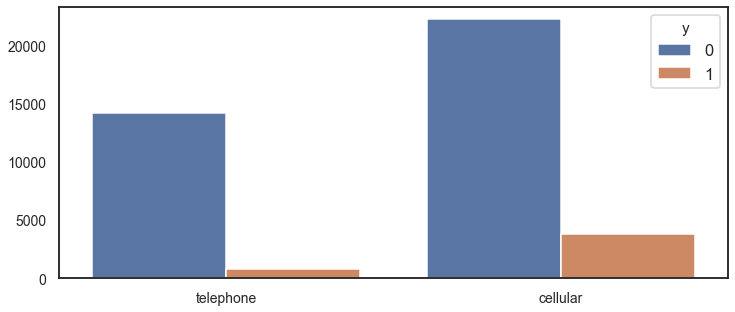

In [15]:
f, (ax1) = plt.subplots(1, 1, figsize=(12, 5), sharex=False)
ax1 = sns.countplot(x='contact', hue='y',data=train)
ax1.tick_params(labelsize=14)
ax1.set_ylabel("")
ax1.set_xlabel("")

In [16]:
pd.crosstab(train['y'], train['contact'], normalize=1)

contact,cellular,telephone
y,,
0,0.852624,0.947687
1,0.147376,0.052313


Uočavamo da je više korisnika ugovorilo oročeni depozit putem mobitela nego putem telefona, no više ih je i ispitano putem mobitela. Točnije, 14.7% ispitanih mobitelom je ugovorilo oročeni depozit, a 5.2% ispitanih telefonom je ugovorilo oročeni depozit.

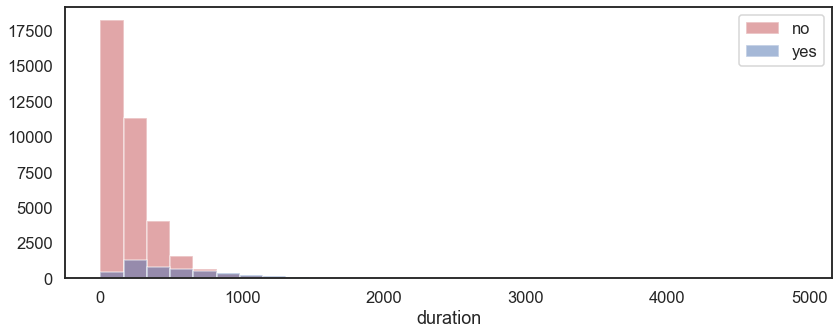

In [17]:
no = train.loc[ train['y'] == 0, : ]
yes = train.loc[ train['y'] == 1, : ]

fig, ax1 = plt.subplots(1, 1, figsize=(12, 5))

_, bins = np.histogram(train.iloc[:,10], bins=30)
ax1.hist(no.iloc[:,10], bins=bins, color='r', alpha=.5, label='no')
ax1.hist(yes.iloc[:,10], bins=bins, color='b', alpha=.5, label='yes')
ax1.legend(loc='upper right')
ax1.set_xlabel("duration")

fig.tight_layout()

Iz grafa uočavamo da duži razgovori povećavaju šanse za ugovaranje oročenog depozita.

In [18]:
train['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

Vidimo da je prosječno vrijeme trajanja razgovora 258 sekundi.

In [19]:
columns = ['duration']
train.groupby(['y'])[columns].describe()

duration                                                            
     count        mean         std   min    25%    50%     75%     max
y                                                                     
0  36548.0  220.844807  207.096293   0.0   95.0  163.5  279.00  4918.0
1   4640.0  553.191164  401.171871  37.0  253.0  449.0  741.25  4199.0

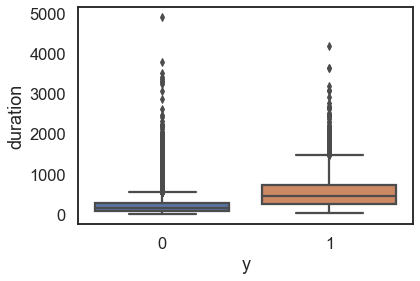

In [20]:
sns.boxplot(x='y', y='duration', data=train)

Kod negativnih odgovora, prosječno vrijeme trajanja razgovora iznosi 220.8 sekundi. Kod pozitivnih odgovora, prosječno vrijeme trajanja razgovora iznosi 553.2 sekundi. To nam potvrđuje da duži razgovori povećavaju šanse za ugovaranje oročenog depozita.

Na isti način možemo analizirati i atribut age.

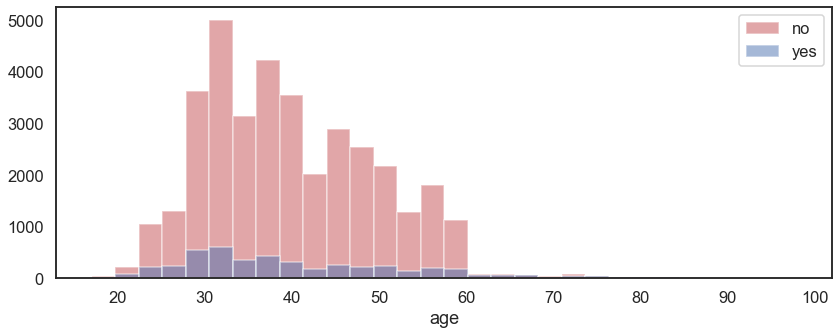

In [21]:
no = train.loc[ train['y'] == 0, : ]
yes = train.loc[ train['y'] == 1, : ]

fig, ax1 = plt.subplots(1, 1, figsize=(12, 5))

_, bins = np.histogram(train.iloc[:,0], bins=30)
ax1.hist(no.iloc[:,0], bins=bins, color='r', alpha=.5, label='no')
ax1.hist(yes.iloc[:,0], bins=bins, color='b', alpha=.5, label='yes')
ax1.legend(loc='upper right')
ax1.set_xlabel("age")

fig.tight_layout()

In [22]:
columns = ['age']
train.groupby(['y'])[columns].describe()

age                                                    
     count       mean        std   min   25%   50%   75%   max
y                                                             
0  36548.0  39.911185   9.898132  17.0  32.0  38.0  47.0  95.0
1   4640.0  40.913147  13.837476  17.0  31.0  37.0  50.0  98.0

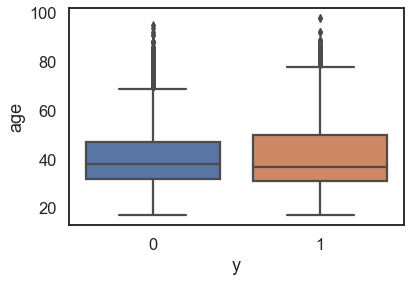

In [23]:
sns.boxplot(x='y', y='age', data=train)

U ovom slučaju primjećujemo da su dobne skupine jednako zastupljene. Srednje vrijednosti za pozitivne i negativne vrijednosti su jako bliske. Zaključujemo da dob korisnika neće biti dobar pokazatelj o tome hoće li korisnik ugovorit oročeni depozit.

Numeričke vrijednosti možemo prikazati u korelacijskoj matrici. Prikazujemo koliko su korelirani određeni atributi.

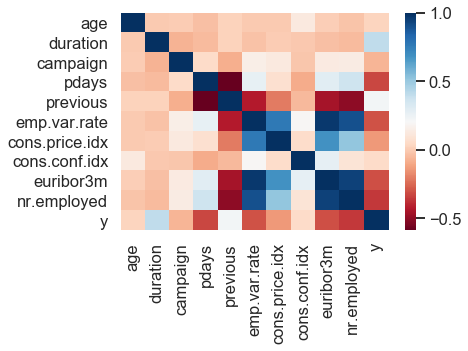

In [24]:
corr = train.corr()
sns.heatmap(corr,cmap='RdBu')

Najveću korelaciju s target varijablom ima atribut duration (trajanje razgovora s korisnikom). Također vidimo da su atributi vezani uz ekonomiju međusobno jako korelirani, što je bilo i za očekivati.

## Analiza ekonomskih atributa

Prikazat ćemo i odnose ciljne varijable s ekonomskim atributima. To su atributi koji nisu direktno vezani uz korisnike, već se smatraju fiksnim za određeni vremenski period i ovise o nekom globalnom stanju ekonomije.

In [25]:
train['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [26]:
train['emp.var.rate'].describe()

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

Text(0.5, 0, '')

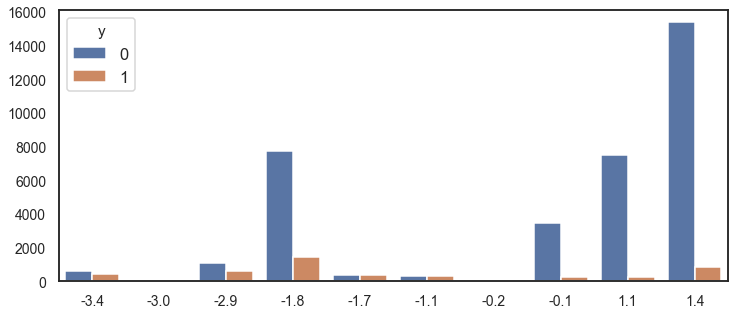

In [27]:
f, (ax1) = plt.subplots(1, 1, figsize=(12, 5), sharex=False)
ax1 = sns.countplot(x='emp.var.rate', hue='y',data=train)
ax1.tick_params(labelsize=14)
ax1.set_ylabel("")
ax1.set_xlabel("")

In [28]:
train['cons.price.idx'].describe()

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

Text(0.5, 0, '')

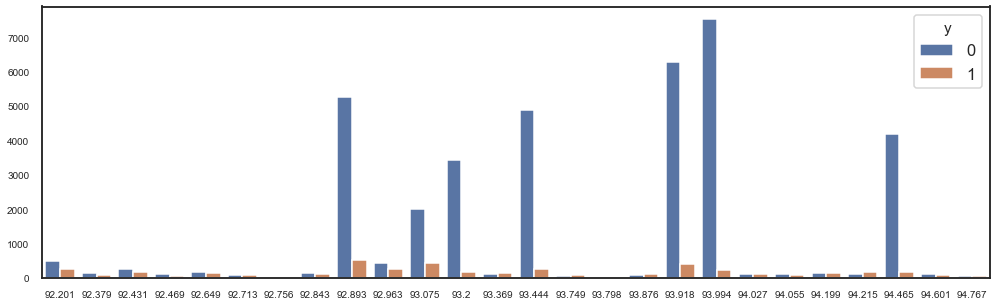

In [29]:
f, (ax1) = plt.subplots(1, 1, figsize=(17, 5), sharex=False)
selected_columns = train[["cons.price.idx","y"]]
new_df = selected_columns.copy()
new_df['cons.price.idx'] = np.around(new_df['cons.price.idx'], decimals = 3)
ax1 = sns.countplot(x='cons.price.idx', hue='y',data=new_df)
ax1.tick_params(labelsize=10)
ax1.set_ylabel("")
ax1.set_xlabel("")

In [30]:
train['cons.conf.idx'].describe()

count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64

Text(0.5, 0, '')

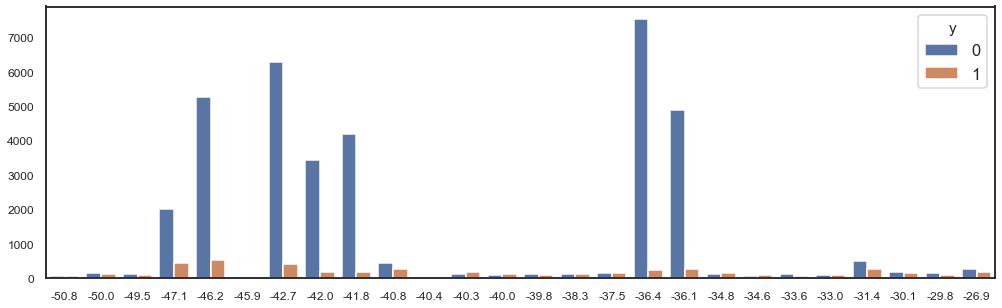

In [31]:
f, (ax1) = plt.subplots(1, 1, figsize=(17, 5), sharex=False)
ax1 = sns.countplot(x='cons.conf.idx', hue='y',data=train)
ax1.tick_params(labelsize=12)
ax1.set_ylabel("")
ax1.set_xlabel("")

In [32]:
train['nr.employed'].describe()

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

Text(0.5, 0, '')

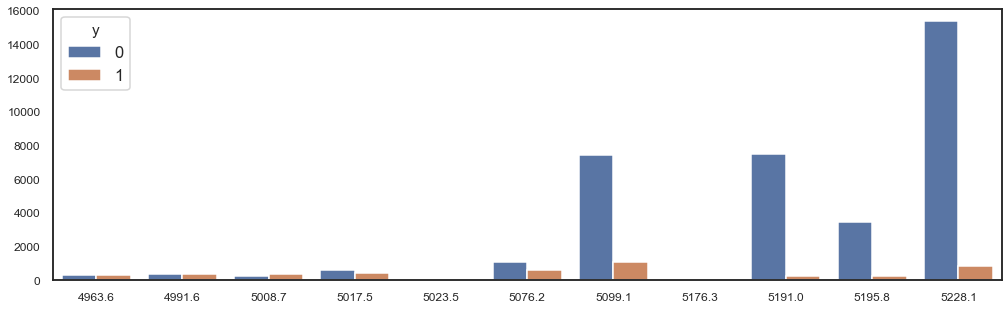

In [33]:
f, (ax1) = plt.subplots(1, 1, figsize=(17, 5), sharex=False)
ax1 = sns.countplot(x='nr.employed', hue='y',data=train)
ax1.tick_params(labelsize=12)
ax1.set_ylabel("")
ax1.set_xlabel("")

In [34]:
train['euribor3m'].describe()

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

In [37]:
print(train['euribor3m'].nunique())

316


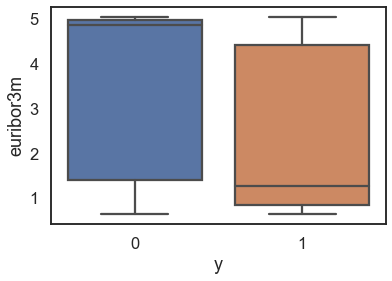

In [39]:
sns.boxplot(data=train,x='y',y='euribor3m')

 Primjećujemo veliku razliku između medijana dviju klasa. Ovo nam pokazuje da bi euribor3m mogao biti koristan feature.